# **Random Forest and ADA Boost**

---

Query pada Big Query

SELECT *
from `ftds-hacktiv8-project.phase1_assignments.heart-failure`

---


----
----

## Import Pustaka

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import pickle
import ast

Proses import pustaka yang akan digunakan pada analisis ini

In [2]:
data = pd.read_csv('h8dsft_P1G3_reynaldimarchiano.csv')
df = data.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


Load data dan menyimpan ke dalam variabel df

In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Tail dari dataset yang berjumlah 299 row

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Info diatas berisi tipe data dari semua kolom, dan bisa disimpulkan kalau tidak ada nilai Null pada data.

----

## EDA

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


----

### > Berapa persentase yang meninggal pada dataset?

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

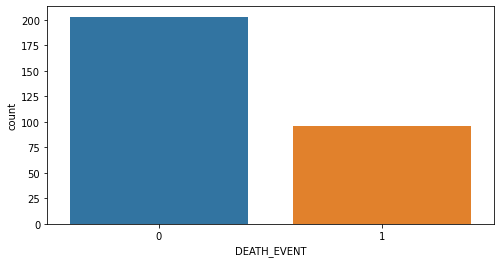

In [6]:
# age = df.groupby('DEATH_EVENT')['age'].count()
plt.figure(figsize=(8,4))
sns.countplot(df['DEATH_EVENT'])

In [7]:
print(round(((df['DEATH_EVENT']==1) .sum())/299*100,2),'%')

32.11 %


> Persentase yang meninggal pada dataset ini sebesar 32.11 %

----

### > Bagaimana sebaran data umur terhadap kematian ?

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

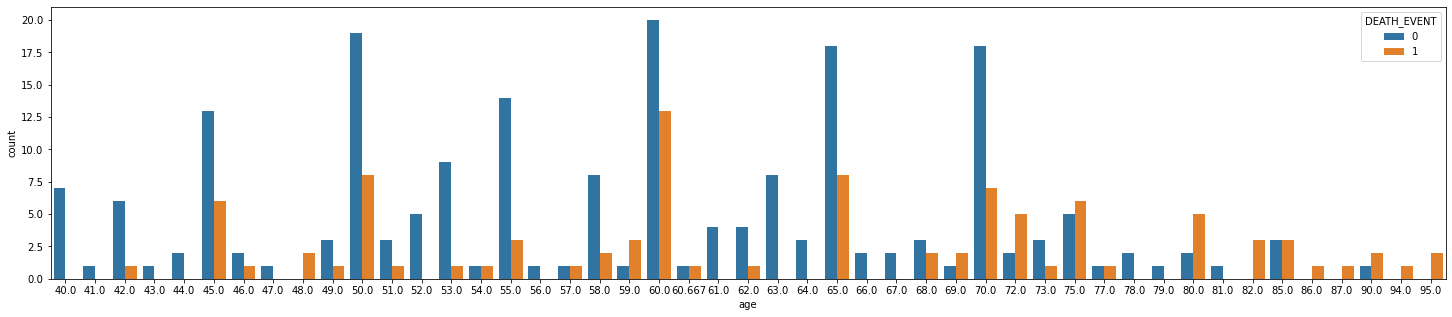

In [8]:
plt.figure(figsize=(25,5))
sns.countplot(df['age'],hue=df['DEATH_EVENT'])

> Berdasarkan boxplot diatas bisa kita lihat kalau setiap 5 tahun sekali dari umur 45 sampai 80 angka kematian cenderung lebih tinggi dari umur lain di setiap dekadenya.

> Umur 60 menjadi umur terbanyak pada dataset ini yang meninggal, sekaligus jadi umur dengan data terbanyak pada dataset ini karena bar kategori tidak meninggal dan meninggal menjadi paling tinggi diantara yang lain.

----

### > Apakah jumlah penderita anemia dan diabetes lebih banyak yang meninggal dibanding yang tidak ?

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes')

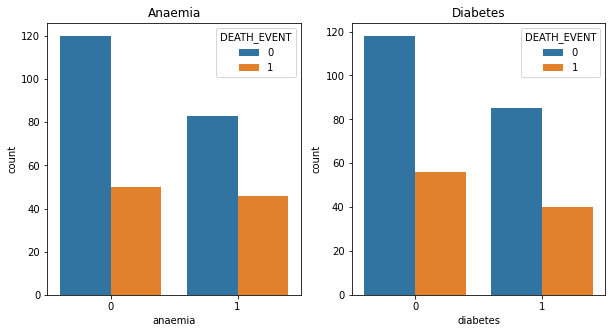

In [9]:
fig = plt.figure(figsize=(10,5))
row = 1
col = 2

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.countplot(df['anaemia'],hue=df['DEATH_EVENT'])
plt.title('Anaemia')

fig.add_subplot(row, col, 2)
sns.countplot(df['diabetes'],hue=df['DEATH_EVENT'])
plt.title('Diabetes')

Dari grafik diatas untuk anemia dan diabetes sama-sama lebih banyak yang tidak meninggal, namun dari jumlah yang meninggal untuk yang tidak menderita kedua penyakit tersebut hampir menyaingi jumlah yang menderita anemia dan diabetes. Bisa diasumsikan kedua penyakit ini bukan penyebab utama seseorang meninggal pada dataset ini.

----

### > Apakah perokok banyak yang menderita anemia?

In [10]:
smoan = df.groupby(df['smoking'])['anaemia'].value_counts().sort_values(ascending=False)

Grouping data berdasarkan yang perokok dan penderita anemia

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes')

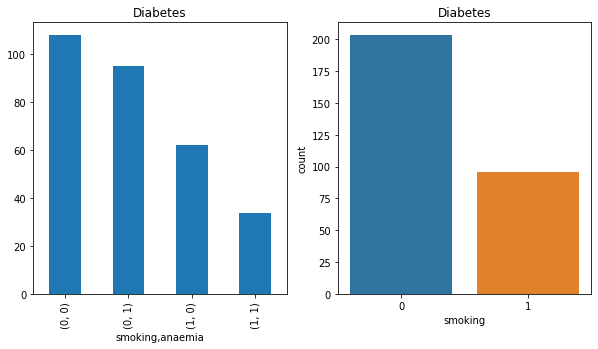

In [11]:
fig = plt.figure(figsize=(10,5))
row = 1
col = 2

fig.add_subplot(row, col, 1)
smoan.plot(kind='bar')
plt.title('Diabetes')

fig.add_subplot(row, col, 2)
sns.countplot(df['smoking'])
plt.title('Diabetes')

Berdasarkan grafik diatas, yang tidak merokok lebih besar perbandingan menderita anemia dibandingkan yang tidak merokok. Untuk yang bukan perokok perbandingannya hampir 1:1 sedangkan yang perokok perbandingannya hampir 1:2 untuk kategori menderita anemia.

Barplot pertama menjelaskan bahwa dari education num 1-12 itu income <=50K lebih banyak jumlahnya dibanding yang >50, dari 12 keatas income >50K lebih banyak.

Barplot kedua menunjukan bahwa wanita lebih banyak yg berpenghasilan <=50K kalau dari ukuran barplot terlihat perempuan lebih banyak yg berpenghasilan.

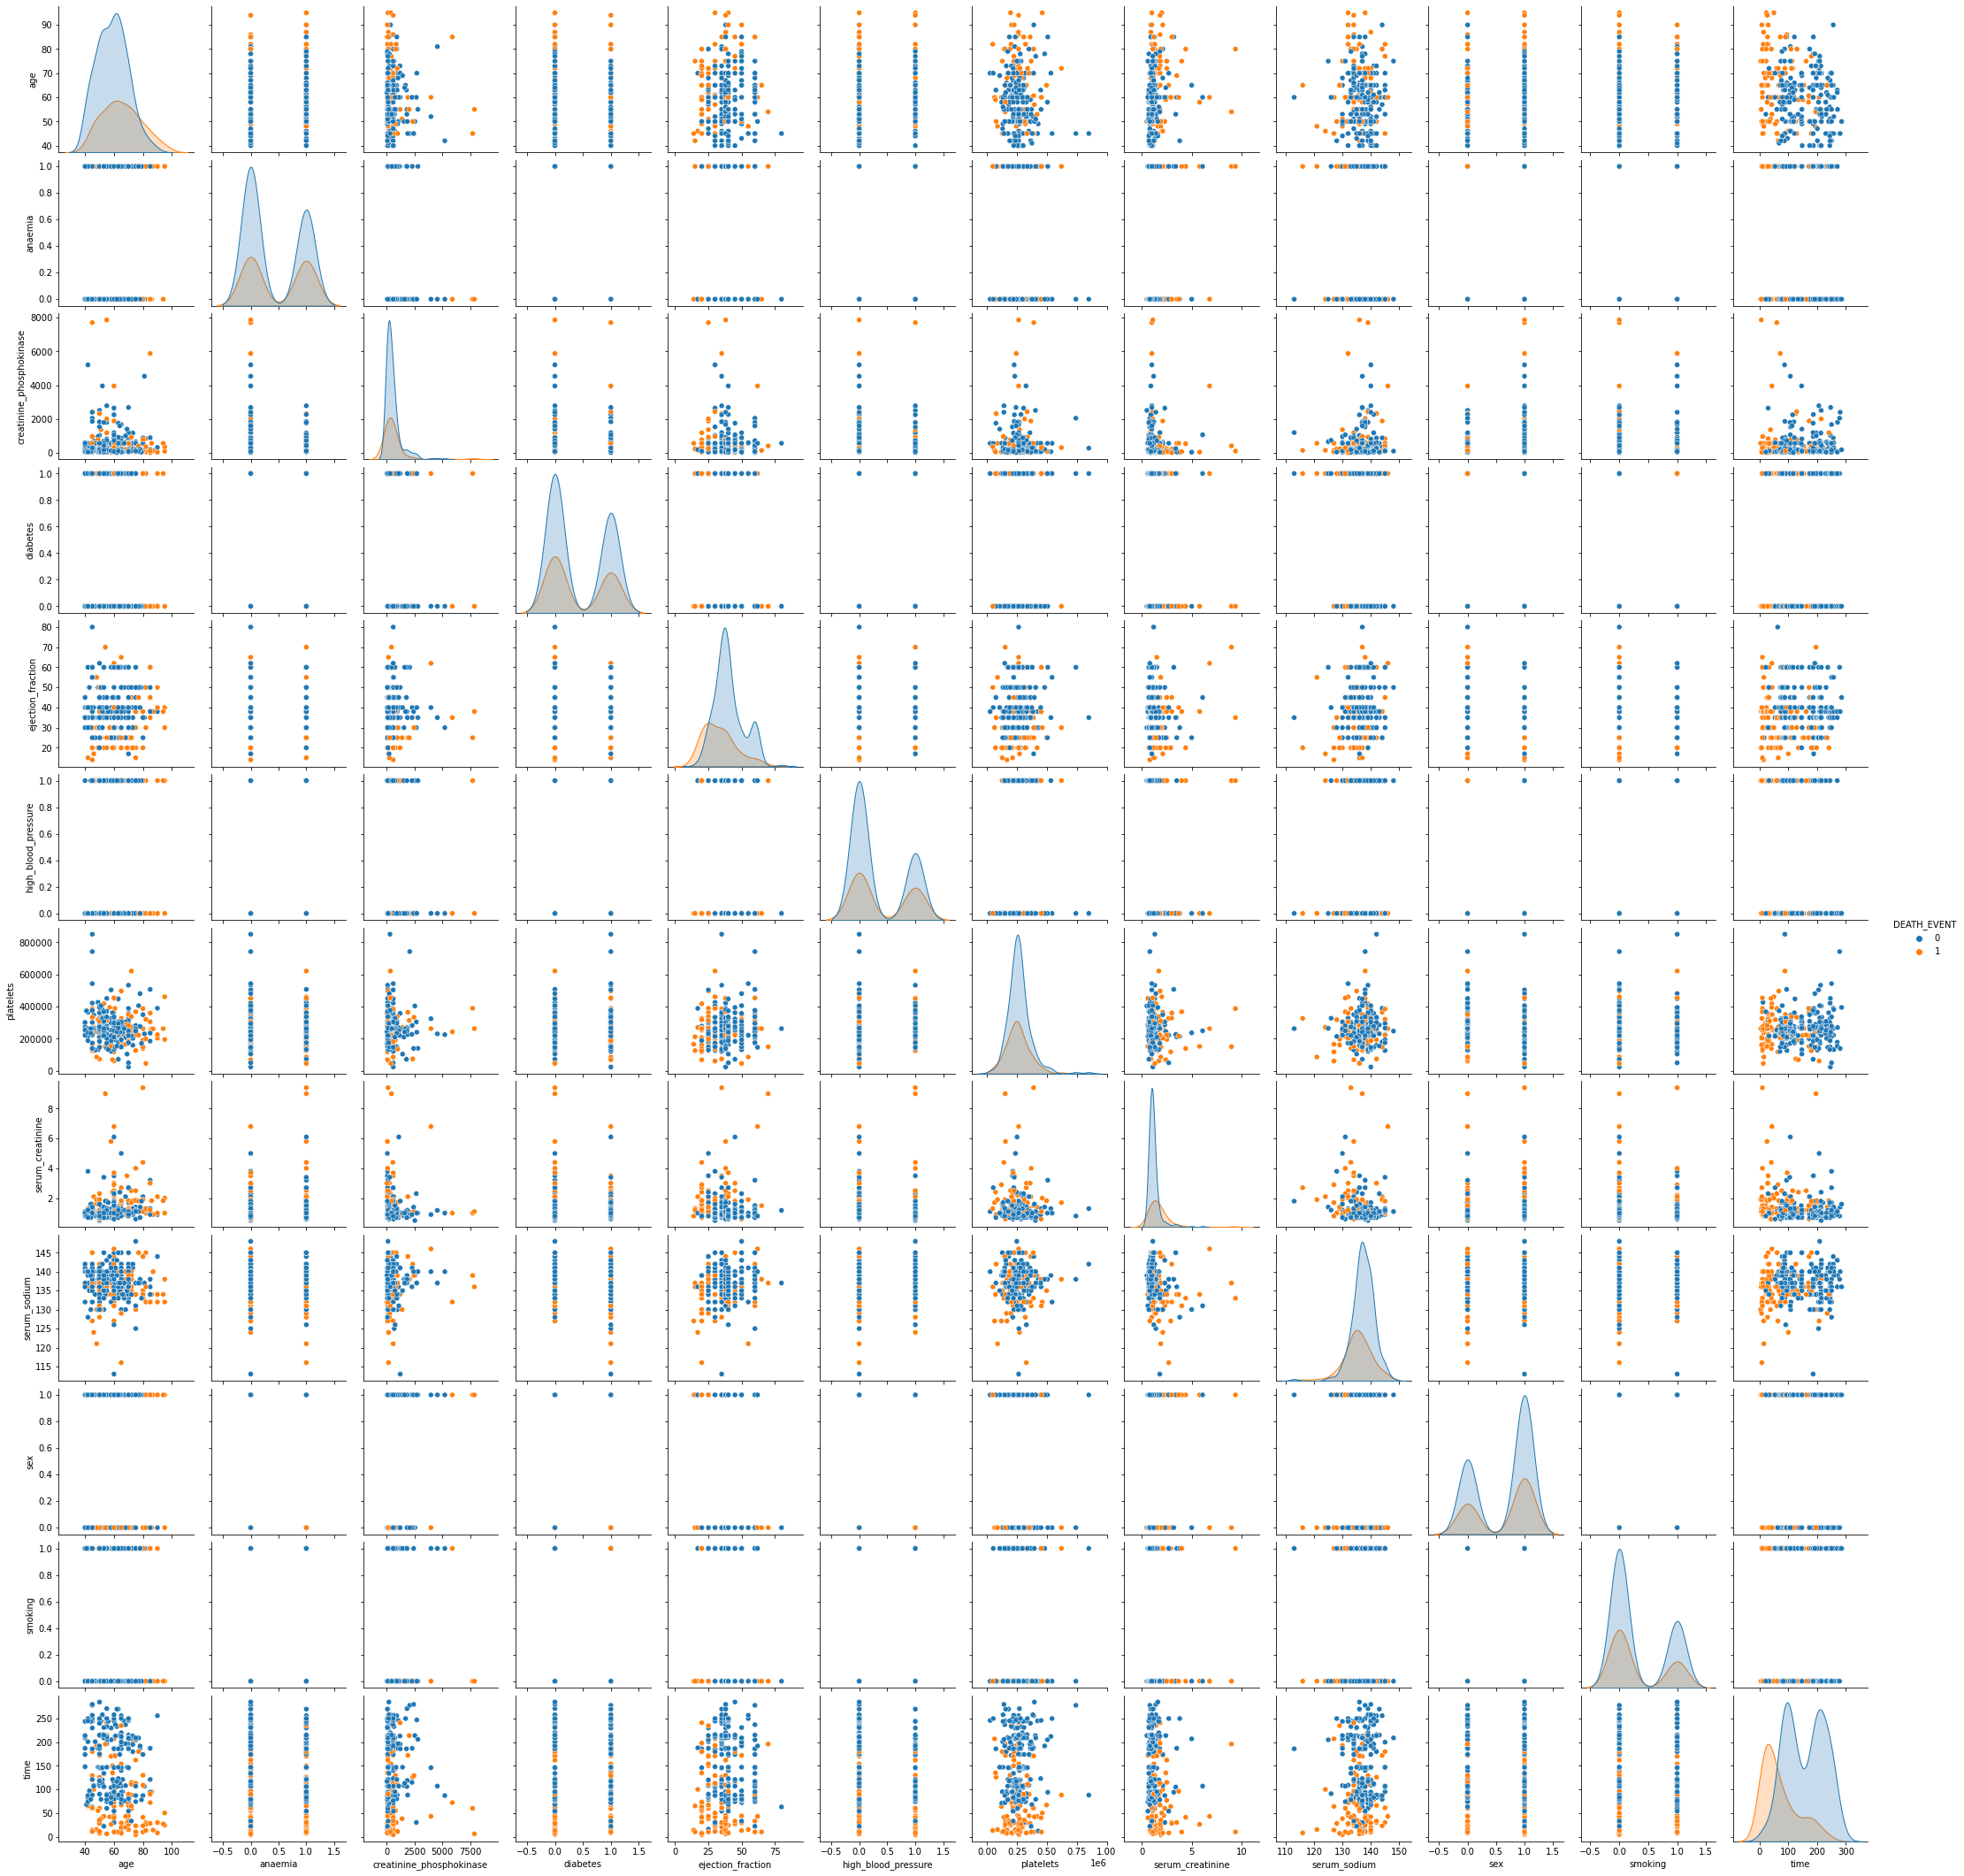

In [12]:
sns.pairplot(df,hue='DEATH_EVENT')

Macam-macam plotting diatas adalah untuk melihat hubungan plot satu antara yang lain dari setiap kolom. Bisa dilihat data tersebut banyak overlap dan hampir tidak berkorelasi.

<AxesSubplot:>

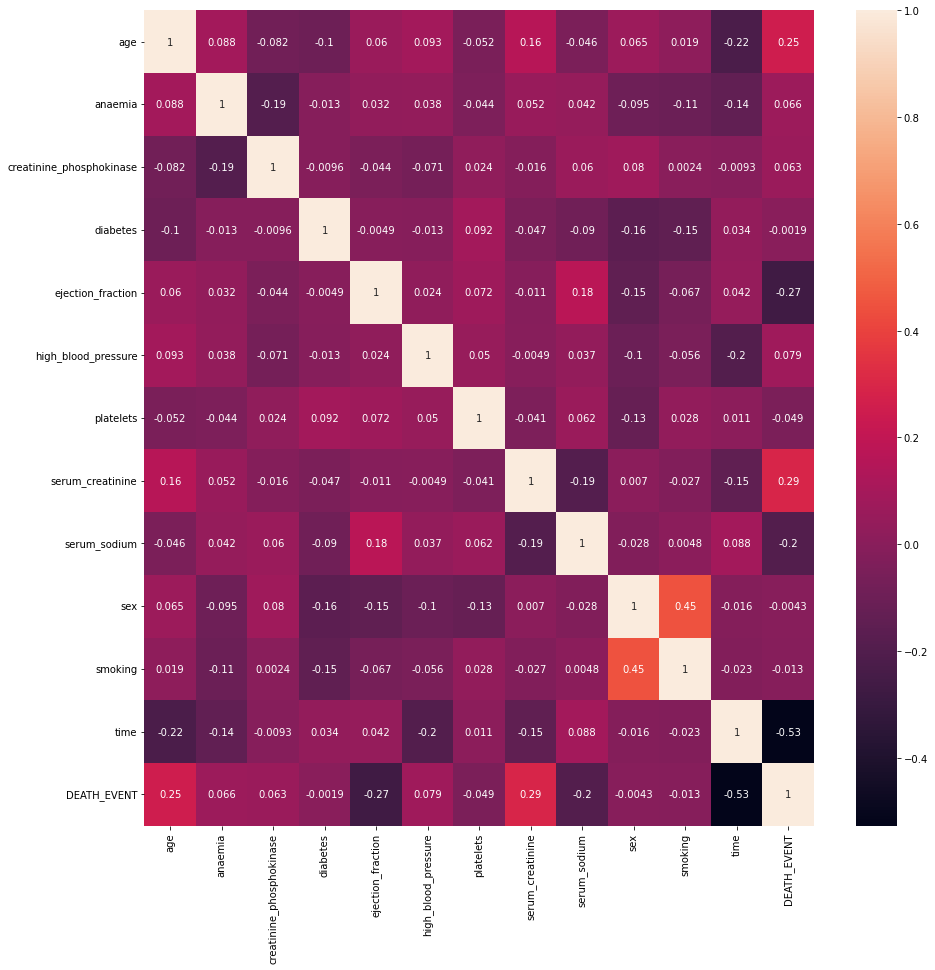

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

Berikut adalah heatmap untuk melihat korelasi antar kolom. Lanjutan dari grafik sebelumnya, kolom numerik pada data ini cenderung tidak berkorelasi sesuai dengan nilai korelasi yang dihasilkan yang mana jauh dari angka 1. Untuk kolom DEATH EVENT, nilai korelasi terbesar ada pada time yang berkorelasi negatif sebesar -0.53

In [14]:
df.corr().sort_values('DEATH_EVENT',ascending=False, key=abs).index

Index(['DEATH_EVENT', 'time', 'serum_creatinine', 'ejection_fraction', 'age',
       'serum_sodium', 'high_blood_pressure', 'anaemia',
       'creatinine_phosphokinase', 'platelets', 'smoking', 'sex', 'diabetes'],
      dtype='object')

Cell diatas adalah hasil penyusunan kolom yang paling berkorelasi dengan DEATH_EVENT. Kita akan mengambil 5 kolom terbaik saja berdasarkan output df.corr()

-----

## Data Preprocessing

In [15]:
df.rename(columns={'creatinine_phosphokinase':'creatinine','high_blood_pressure':'hbloodpress','DEATH_EVENT':'death',
                    'ejection_fraction':'ejfrac','serum_creatinine':'sercreat'},inplace=True)
df.head()

,age,anaemia,creatinine,diabetes,ejfrac,hbloodpress,platelets,sercreat,serum_sodium,sex,smoking,time,death
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


Mengubah nama beberapa kolom untuk mempermudah dan efisiensi pengetikan.

In [16]:
kolom = ['death', 'time', 'sercreat', 'ejfrac', 'age','serum_sodium']
df_cek = df[kolom]
df_cek.head()

,death,time,sercreat,ejfrac,age,serum_sodium
0,1,65,1.3,15,42.0,136
1,1,100,2.1,17,46.0,124
2,1,8,2.7,20,65.0,116
3,1,43,1.4,20,53.0,139
4,0,186,1.0,20,50.0,134


Filtering data sesuai hasil 5 kolom yang berkorelasi dengan kolom death

In [17]:
df_cek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   death         299 non-null    int64  
 1   time          299 non-null    int64  
 2   sercreat      299 non-null    float64
 3   ejfrac        299 non-null    int64  
 4   age           299 non-null    float64
 5   serum_sodium  299 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 14.1 KB


Berikut adalah hasil filtering kolom yang akan digunakan.

## Inference

In [18]:
# get data for model inference
df_inf = df_cek.sample(10, random_state=92)
df_inf

,death,time,sercreat,ejfrac,age,serum_sodium
260,0,121,1.1,45,59.0,139
205,1,6,1.1,38,55.0,136
28,1,28,1.0,35,50.0,128
244,0,187,0.7,40,78.0,137
31,0,120,0.8,35,65.0,136
150,1,11,1.1,30,45.0,137
203,0,258,1.4,35,60.0,139
92,0,94,0.7,60,60.0,136
265,0,215,1.0,45,50.0,133
188,0,146,0.9,35,65.0,137


Mengambil 10 data inference untuk nantinya diuji coba terhadap model yang sudah dibuat.

In [19]:
df_train_test = df_cek.drop(df_inf.index)
df_train_test

,death,time,sercreat,ejfrac,age,serum_sodium
0,1,65,1.3,15,42.0,136
1,1,100,2.1,17,46.0,124
2,1,8,2.7,20,65.0,116
3,1,43,1.4,20,53.0,139
4,0,186,1.0,20,50.0,134
...,...,...,...,...,...,...
294,0,147,1.2,60,63.0,145
295,0,186,1.0,60,45.0,136
296,0,186,0.9,60,70.0,138
297,0,215,1.0,60,53.0,139


Data yang telah dipisahkan dari 10 data inference disimpan dalam variabel df_train_test

In [20]:
# reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,death,time,sercreat,ejfrac,age,serum_sodium
0,0,121,1.1,45,59.0,139
1,1,6,1.1,38,55.0,136
2,1,28,1.0,35,50.0,128
3,0,187,0.7,40,78.0,137
4,0,120,0.8,35,65.0,136
5,1,11,1.1,30,45.0,137
6,0,258,1.4,35,60.0,139
7,0,94,0.7,60,60.0,136
8,0,215,1.0,45,50.0,133
9,0,146,0.9,35,65.0,137


Reset index dari kedua dataframe yang telah dipisahkan.

----

## Splitting Dataset

In [21]:
# Split between `X` (Features) and `y` (Target)
X = df_train_test.drop('death',axis=1)
y = df_train_test['death']
X

,time,sercreat,ejfrac,age,serum_sodium
0,65,1.3,15,42.0,136
1,100,2.1,17,46.0,124
2,8,2.7,20,65.0,116
3,43,1.4,20,53.0,139
4,186,1.0,20,50.0,134
...,...,...,...,...,...
284,147,1.2,60,63.0,145
285,186,1.0,60,45.0,136
286,186,0.9,60,70.0,138
287,215,1.0,60,53.0,139


Sekarang memisahkan data fitur dan data target ke dalam variabel X dan y

In [22]:
# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

print('X_train Size =', X_train.shape)
print('X_test Size  =', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_train Size = (231, 5)
X_test Size  = (58, 5)
y_train Size = (231,)
y_test Size  = (58,)


Setelah itu dibuat juga ke dalam train-test set untuk kedua variabel.

----

## Handling Missing Value

In [23]:
X_train.isnull().sum()

time            0
sercreat        0
ejfrac          0
age             0
serum_sodium    0
dtype: int64

Tidak ada missing value di X_train

In [24]:
y_train.isnull().sum()

0

Tidak ada missing value di y_train

In [25]:
X_test.isnull().sum()

time            0
sercreat        0
ejfrac          0
age             0
serum_sodium    0
dtype: int64

Tidak ada missing value di X_test

In [26]:
y_test.isnull().sum()

0

Tidak ada missing value di y_test

Tidak ada missing value pada train test set

----

## Handling Outlier

In [27]:
num_col = df_cek.select_dtypes(include=['int64','float64']).copy()
cat_col = df_cek.select_dtypes(include=['object']).copy()

Pengelompokan berdasarkan tipe data

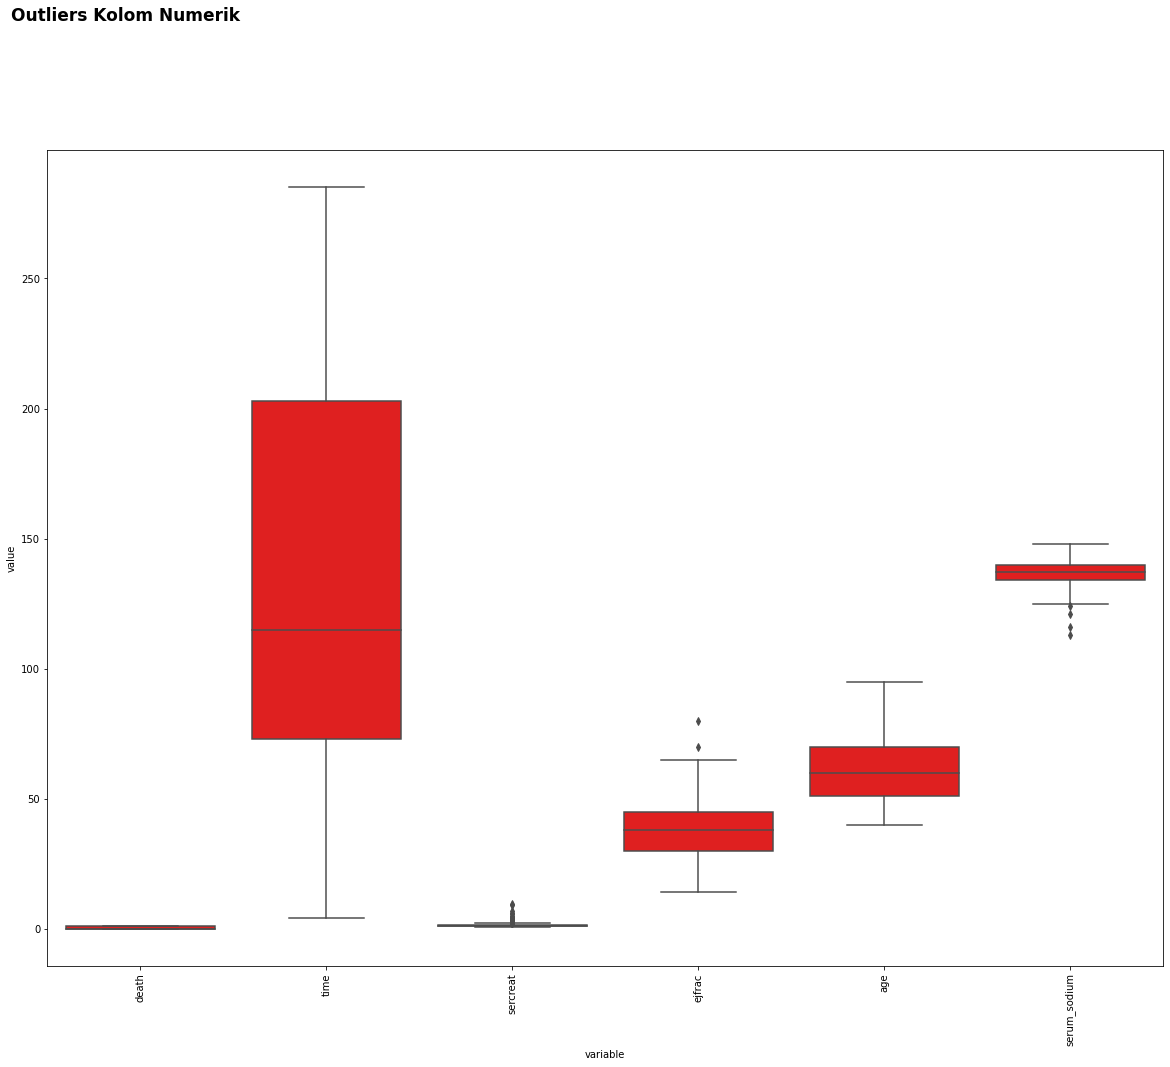

In [28]:
numeric = df[[feature for feature in num_col if feature not in []]]
numericmelt = numeric.melt()
plt.figure(figsize=(20,15))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontsize=17, fontweight='bold')
box = sns.boxplot(x='variable', y='value', data=numericmelt, palette=['r']*len(num_col))
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

Dari semua boxplot diatas bisa kita lihat kolom sercreat, serum_sodium dan ejfrac memiliki outliers

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Serum Sodium')

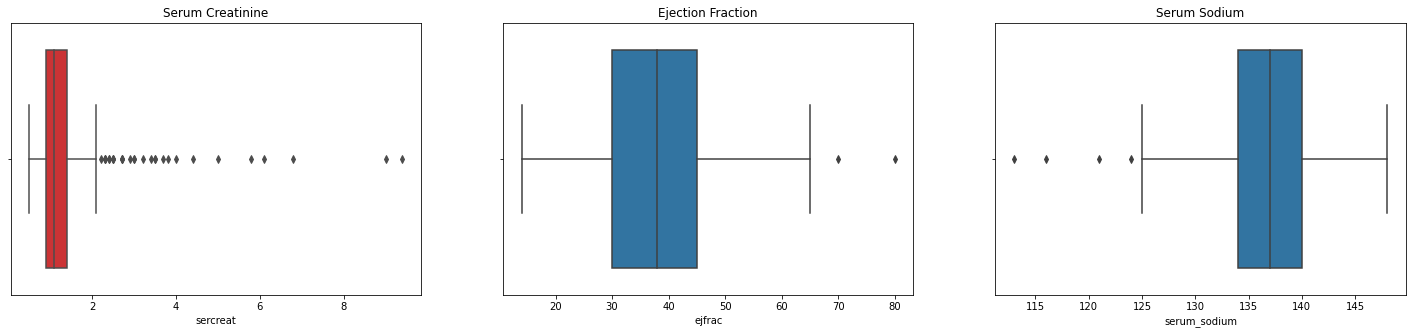

In [29]:
fig = plt.figure(figsize=(25,5))
row = 1
col = 3

# figure, axis = plt.subplots(2,2)
fig.add_subplot(row, col, 1)
sns.boxplot(df_cek['sercreat'],palette='Set1')
plt.title('Serum Creatinine')

fig.add_subplot(row, col, 2)
sns.boxplot(df_cek['ejfrac'])
plt.title('Ejection Fraction')

fig.add_subplot(row, col, 3)
sns.boxplot(df_cek['serum_sodium'])
plt.title('Serum Sodium')

Kita lebih detail untuk boxplot dari kolom sercreat, ejfrac, dan serum_sodium

In [30]:
print('X_train skewness =\n',X_train.skew())
print('X_test skewness =\n',X_test.skew())

X_train skewness =
 time            0.242502
sercreat        4.480767
ejfrac          0.542688
age             0.387271
serum_sodium   -0.794123
dtype: float64
X_test skewness =
 time           -0.368714
sercreat        3.905342
ejfrac          0.824853
age             0.447849
serum_sodium   -1.811389
dtype: float64


dari X train test set didapatkan bahwa sebaran datanya right skewed karena skewness bernilai <0.5 untuk kolom time dan age di X_train, dan >0.5 untuk kolom sercreat dan ejfrac

In [31]:
print('Serum Creatinine Minimum =',X_train['sercreat'].min())
print('Serum Creatinine Maximum =',X_train['sercreat'].max())
print('Ejection Fraction Minimum =',X_train['ejfrac'].min())
print('Ejection Fraction Maximum =',X_train['ejfrac'].max())
print('Serum Sodium Minimum =',X_train['serum_sodium'].min())
print('Serum Sodium Maximum =',X_train['serum_sodium'].max())

Serum Creatinine Minimum = 0.6
Serum Creatinine Maximum = 9.4
Ejection Fraction Minimum = 14
Ejection Fraction Maximum = 80
Serum Sodium Minimum = 116
Serum Sodium Maximum = 148


Berikut ada nilai min dan max pada X_train dataset

In [32]:
q1sc, q3sc = X_train['sercreat'].quantile([0.25, 0.75])
q1ej, q3ej = X_train['ejfrac'].quantile([0.25, 0.75])
q1ss, q3ss = X_train['serum_sodium'].quantile([0.25, 0.75])

print(X_train['sercreat'].quantile([0.25, 0.75]))
print(X_train['ejfrac'].quantile([0.25, 0.75]))
print(X_train['serum_sodium'].quantile([0.25, 0.75]))

0.25    0.9
0.75    1.4
Name: sercreat, dtype: float64
0.25    30.0
0.75    45.0
Name: ejfrac, dtype: float64
0.25    134.0
0.75    140.0
Name: serum_sodium, dtype: float64


Mendapatkan nilai q1,q2,q3

In [33]:
iqrsc = q3sc - q1sc
iqrej = q3ej - q1ej
iqrss = q3ss - q1ss

minsc = q1sc - (1.5*iqrsc)
maxsc = q3sc + (1.5*iqrsc)
minej = q1ej - (1.5*iqrej)
maxej = q3ej + (1.5*iqrej)
minss = q1ss - (1.5*iqrss)
maxss = q3ss + (1.5*iqrss)

print("Batas Minimum Outlier X_train Serum Creatinine =", minsc)
print("Batas Maximum Outlier X_train Serum Creatinine =", maxsc)
print("Batas Minimum Outlier X_train Ejection Fraction =", minej)
print("Batas Maximum Outlier X_train Ejection Fraction =", maxej)
print("Batas Minimum Outlier X_train Serum Sodium =", minss)
print("Batas Maximum Outlier X_train Serum Sodium =", maxss)

Batas Minimum Outlier X_train Serum Creatinine = 0.15000000000000024
Batas Maximum Outlier X_train Serum Creatinine = 2.1499999999999995
Batas Minimum Outlier X_train Ejection Fraction = 7.5
Batas Maximum Outlier X_train Ejection Fraction = 67.5
Batas Minimum Outlier X_train Serum Sodium = 125.0
Batas Maximum Outlier X_train Serum Sodium = 149.0


Perhitungan batas minimum dan maximum outlier

In [34]:
ix = (X_train[(X_train['sercreat']>maxsc) | (X_train['sercreat']<minsc) | (X_train['ejfrac']>maxej) | (X_train['ejfrac']<minej) | (X_train['serum_sodium']>maxss) | (X_train['serum_sodium']<minss)]).index
ix

Int64Index([112, 210,  90,  56, 169, 229, 250,  77, 115,  82,  98, 144,   8,
            166, 165,  40, 101, 148,  41, 139,  72,   2,   1, 244,  12, 109],
           dtype='int64')

Query data untuk membuang outlier dengan menyimpan list indexnya

In [35]:
X_train.drop(ix,inplace=True)

Filtering data X_train sesuai index hasil query

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 143 to 257
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          205 non-null    int64  
 1   sercreat      205 non-null    float64
 2   ejfrac        205 non-null    int64  
 3   age           205 non-null    float64
 4   serum_sodium  205 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 9.6 KB


Data X_train sudah berkurang hasil handling outlier

In [37]:
X_train.reset_index(drop=True)

,time,sercreat,ejfrac,age,serum_sodium
0,214,1.1,25,55.0,138
1,79,1.1,35,55.0,137
2,106,0.7,60,53.0,138
3,245,1.0,30,60.0,137
4,66,1.2,25,70.0,142
...,...,...,...,...,...
200,30,1.0,50,90.0,134
201,145,0.8,35,70.0,133
202,107,1.3,60,63.0,145
203,15,1.0,25,70.0,140


Mereset index dari X_train

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Serum Sodium')

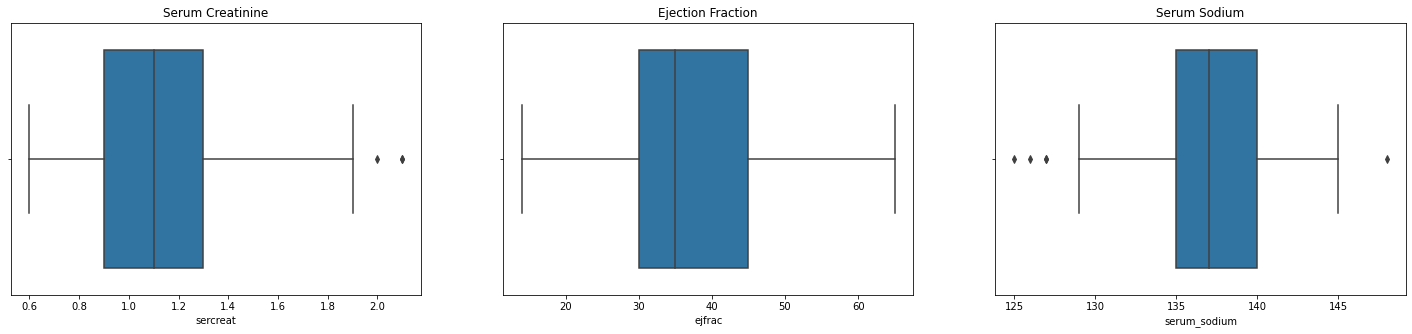

In [38]:
fig = plt.figure(figsize=(25,5))
row = 1
col = 3

fig.add_subplot(row, col, 1)
sns.boxplot(X_train['sercreat'])
plt.title('Serum Creatinine')

fig.add_subplot(row, col, 2)
sns.boxplot(X_train['ejfrac'])
plt.title('Ejection Fraction')

fig.add_subplot(row, col, 3)
sns.boxplot(X_train['serum_sodium'])
plt.title('Serum Sodium')

Hasil boxplot diatas terlihat lebih baik dengan berkurangnya outlier yang telah di handle

In [39]:
y_train.drop(ix,inplace=True)

Menyesuaikan row data di y_train sesuai dengan X_train berdasarkan index row yg di drop tadi

In [40]:
y_train.reset_index(drop=True)

0      1
1      0
2      0
3      0
4      1
      ..
200    1
201    0
202    0
203    1
204    1
Name: death, Length: 205, dtype: int64

reset_index dari y_train

In [41]:
print('X_train Size =', X_train.shape)
print('X_test Size  =', X_test.shape)
print('y_train Size =', y_train.shape)
print('y_test Size  =', y_test.shape)

X_train Size = (205, 5)
X_test Size  = (58, 5)
y_train Size = (205,)
y_test Size  = (58,)


Berikut adalah ukuran dari 4 variabel X y train set setelah handling outlier

## Feature Selection

In [42]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['time', 'sercreat', 'ejfrac', 'age', 'serum_sodium']
Categorical Columns :  []


Pemisahan antara kolom numerikal dan kategorikal

## Feature Scaling & Encoding

In [43]:
print('X_train skewness =\n',X_train.skew())
print('X_test skewness =\n',X_test.skew())

X_train skewness =
 time            0.167189
sercreat        0.909885
ejfrac          0.444737
age             0.402937
serum_sodium   -0.254006
dtype: float64
X_test skewness =
 time           -0.368714
sercreat        3.905342
ejfrac          0.824853
age             0.447849
serum_sodium   -1.811389
dtype: float64


Data X_train_num sedikit skewed karena != 0 , maka perlu discaling ada yang >0.5 dan ada juga yang <0.5 menggunakan MinMaxScaler yang akan dibuat dalam pipeline

In [44]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', MinMaxScaler())])

# cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

**Tidak ada kolom kategorikal maka tidak ada encoding**

In [45]:
preprocessor =  ColumnTransformer([
    ('numeric', num_pipeline,['time', 'sercreat', 'ejfrac', 'age'])
])

ColumnTransformer untuk pengolahan handling missing value berdasarkan kategori dalam pipeline

## Model Definition

----

### Random Forest

---

In [46]:
pipeline_rf = Pipeline([('prep',preprocessor),('rf',RandomForestClassifier(random_state=28))])

Pembuatan model pipeline Decision Tree dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [47]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['time', 'sercreat', 'ejfrac',
                                                   'age'])])),
                ('rf', RandomForestClassifier(random_state=28))])

Cell diatas adalah proses fit dengan model Decision Tree terhadap X_train dan y_train.

In [48]:
y_pred_rf_train = pipeline_rf.predict(X_train)
y_pred_rf_test = pipeline_rf.predict(X_test)

Proses prediksi untuk data X_train dan X_test

----

#### Hyperparameter Tuning for Random Forest

In [49]:
parameter_rf= {
    'rf__max_depth': [None,0,1,2,3,4,5],
    'rf__min_samples_split': np.arange(2,6),
    'rf__min_samples_leaf' : np.arange(2,6),
    'rf__max_leaf_nodes' : [5, 10,15],
    'rf__n_estimators': [10,15,20,25]
}

Membuat kandidat-kandidat hyperparameter yang akan diprediksi scorenya menggunakan GridSearch

In [50]:
best_rf = GridSearchCV(pipeline_rf, parameter_rf, cv=3, n_jobs=-1, verbose=1)

Cell diatas adalah proses pencari hyperparameter menggunakan parameter-paramater yang telah disiapkan sebelumnya.

In [51]:
best_rf.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
576 fits failed out of a total of 4032.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\ProgramData\Anaconda3\li

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['time',
                                                                          'sercreat',
                                                                          'ejfrac',
                                                                          'age'])])),
                                       ('rf',
                                        RandomF

Proses Fit menggunakan Model Random Forest yang sudah di Hyperparameter Tuning.

In [52]:
best_rf.best_params_

{'rf__max_depth': 5,
 'rf__max_leaf_nodes': 10,
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 10}

Hyperparameter terbaik hasil dari pencarian menggunakan GridSearchCV

----

### ADA Boost Classifier

----

In [53]:
pipeline_ada = Pipeline([('prep',preprocessor),('ada',AdaBoostClassifier(random_state=28))])

Pembuatan model pipeline ADA Boost Classifier dengan memasukkan proses preprocessing yang sebelumnya telah dibuat, dan menggunakan hyperparameter default.

In [54]:
pipeline_ada.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['time', 'sercreat', 'ejfrac',
                                                   'age'])])),
                ('ada', AdaBoostClassifier(random_state=28))])

Cell diatas adalah proses fit dengan model ADA Boost Classifier terhadap X_train dan y_train.

----

#### Hyperparameter Tuning untuk ADA Boost Classifier

In [55]:
parameter_ada= {
    'ada__learning_rate': [0.5 , 1.0, 2.5,3.0,3.5],
    'ada__n_estimators': [5, 10, 15, 25, 50],
    'ada__base_estimator': [None, DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4)],
    'ada__algorithm': ['SAMME', 'SAMME.R']}

Menentukan hyperparameter yang akan dicari mana yang paling baik untuk ADA Boost. Hyperparamater default untuk ADA Boost Classifier adalah base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None).

In [56]:
best_ada = GridSearchCV(pipeline_ada, parameter_ada, cv=3, n_jobs=-1, verbose=1)

Proses Grid Search CV untuk mencari hyperparameter terbaik dari model ADA Boost Classifier

In [57]:
best_ada.fit(X_train,y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['time',
                                                                          'sercreat',
                                                                          'ejfrac',
                                                                          'age'])])),
                                       ('ada',
                                        AdaBoo

Cell di atas adalah proses fit menggunakan model ADA Boost Classifier dengan hyperparameter yang telah di tuning.

In [58]:
best_ada.best_params_

{'ada__algorithm': 'SAMME',
 'ada__base_estimator': DecisionTreeClassifier(max_depth=4),
 'ada__learning_rate': 0.5,
 'ada__n_estimators': 25}

Parameter terbaik hasil pencarian dengan Grid Search CV adalah 'ada__algorithm': 'SAMME.R',
 'ada__base_estimator': DecisionTreeClassifier(max_depth=2),
 'ada__learning_rate': 0.5,
 'ada__n_estimators': 5

In [59]:
y_pred_bestada_train = best_ada.predict(X_train)
y_pred_bestada_test = best_ada.predict(X_test)

Proses prediksi menggunakan model Ada Boost Classifier yang telah diatur hyperparameternya

----

## Model Evaluation

In [60]:
# Predict Train-Set and Test-Set
y_pred_rf_train = pipeline_rf.predict(X_train)
y_pred_rf_test = pipeline_rf.predict(X_test)

y_pred_bestrf_train = best_rf.predict(X_train)
y_pred_bestrf_test = best_rf.predict(X_test)


y_pred_ada_train = pipeline_ada.predict(X_train)
y_pred_ada_test = pipeline_ada.predict(X_test)

y_pred_bestada_train = best_ada.predict(X_train)
y_pred_bestada_test = best_ada.predict(X_test)


Proses prediksi kematian menggunakan 4 model yang telah dibuat.

----

**> EVALUASI UNTUK MODEL RANDOM FOREST**

In [61]:
print('Classification Report (Random Forest Data Train)')
print('------------------------------------------------\n')
print(classification_report(y_train, y_pred_rf_train))
print('Classification Report (Random Forest Data Test)')
print('------------------------------------------------\n')
print(classification_report(y_test, y_pred_rf_test))

Classification Report (Random Forest Data Train)
------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        65

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Classification Report (Random Forest Data Test)
------------------------------------------------

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.64      0.58      0.61        12

    accuracy                           0.84        58
   macro avg       0.76      0.75      0.76        58
weighted avg       0.84      0.84      0.84        58



Model random forest dengan hyperparameter default terlihat janggal memberikan nilai sempurna, namun ketika memprediksi Data Test nilai akurasinya turun jauh yang berarti model ini overfitting.

In [62]:
print('Classification Report (Random Forest With Hyperparameter Tuning In Data Train)')
print('------------------------------------------------------------------------------\n')
print(classification_report(y_train, y_pred_bestrf_train))
print('Classification Report (Random Forest With Hyperparameter Tuning In Data Test)')
print('------------------------------------------------------------------------------\n')
print(classification_report(y_test, y_pred_bestrf_test))

Classification Report (Random Forest With Hyperparameter Tuning In Data Train)
------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       140
           1       0.92      0.89      0.91        65

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.94      0.94      0.94       205

Classification Report (Random Forest With Hyperparameter Tuning In Data Test)
------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.67      0.67      0.67        12

    accuracy                           0.86        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.86      0.86      0.86        58



Pada model Random Forest yang telah dilakukan hyperparameter tuning, untuk prediksi di data train terlihat lebih masuk akal, namun masih overfitting karena prediksi di data test turun jauh akurasinya.

---

**> EVALUASI UNTUK MODEL ADA BOOST CLASSIFIER**

In [63]:
print('Classification Report (ADA Boost Classfier Data Train)')
print('------------------------------------------------\n')
print(classification_report(y_train, y_pred_ada_train))
print('Classification Report (ADA Boost Classfier Data Test)')
print('------------------------------------------------\n')
print(classification_report(y_test, y_pred_ada_test))

Classification Report (ADA Boost Classfier Data Train)
------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.90      0.83      0.86        65

    accuracy                           0.92       205
   macro avg       0.91      0.89      0.90       205
weighted avg       0.92      0.92      0.92       205

Classification Report (ADA Boost Classfier Data Test)
------------------------------------------------

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.75      0.50      0.60        12

    accuracy                           0.86        58
   macro avg       0.81      0.73      0.76        58
weighted avg       0.85      0.86      0.85        58



Model ADA Boost Classifier dengan hyperparameter default skor di data train terlihat baik diatas 90an semua, namun ketika memprediksi Data Test nilai akurasinya turun jauh yang berarti model ini overfitting. Nilai recall pada data test juga bisa dikatakan jelek.

In [64]:
print('Classification Report (ADA Boost Classifier With Hyperparameter Tuning In Data Train)')
print('------------------------------------------------------------------------------\n')
print(classification_report(y_train, y_pred_bestada_train))
print('Classification Report (ADA Boost Classifier With Hyperparameter Tuning In Data Test)')
print('------------------------------------------------------------------------------\n')
print(classification_report(y_test, y_pred_bestada_test))

Classification Report (ADA Boost Classifier With Hyperparameter Tuning In Data Train)
------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        65

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Classification Report (ADA Boost Classifier With Hyperparameter Tuning In Data Test)
------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.62      0.67      0.64        12

    accuracy                           0.84        58
   macro avg       0.76      0.78      0.77        58
weighted avg       0.85      0.84      0.85        58



Hasil akurasi pada proses hyperparameter tuning terlihat masih overfitting dan janggal karena akurasi di data train bisa sampai 100%. Untuk Recall score dari model ini masih kurang bagus juga.

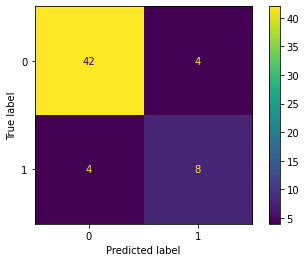

In [73]:
cm = confusion_matrix(y_test,y_pred_bestrf_test, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_rf.classes_)

disp.plot()
plt.show()

Berdasarkan Confusion Matrix diatas : *(1 = Positif)*

    > True Positif = 8

    > False Positif = 4

    > True Negatif = 42
    
    > False Negatif = 4

> Pada kasus ini nilai recall menjadi sorotan utama. Pada kedua model baik sudah diatur hyperparameter maupun belum mengeluarkan nilai recall yang kurang baik. Diantara 4 classification report setiap model, dipilih Random Forest yang telah di hyperparameter tuning *(recall = 67 % )* yang digunakan untuk evaluasi akhir.

> False Negatif akan sangat berbahaya untuk seseorang dimana mungkin dia mempunyai beberapa kondisi kesehatan kurang baik namun diprediksi sehat-sehat saja, orang itu bisa jadi tidak mengobati kondisinya malah memperparah kondisi tubuhnya.

> Untuk False Positif disini dianggap bisa ditoleransi karena masih ada efek baik yang dihasilkan dengan membuat seseorang berusaha mengubah pola hidupnya lebih sehat.

----

## Model Saving

In [66]:
# Model Saving

with open('pipeline_rf.pkl', 'wb') as file_1:
  pickle.dump(pipeline_rf, file_1)
  
with open('best_rf.pkl', 'wb') as file_2:
  pickle.dump(best_rf, file_2)
  
with open('pipeline_ada.pkl', 'wb') as file_3:
  pickle.dump(pipeline_ada, file_3)

with open('best_ada.pkl', 'wb') as file_4:
  pickle.dump(best_ada, file_4)

with open('list_num_columns.txt', 'w') as file_5:
  file_5.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_6:
  file_6.write(str(cat_columns))

Penyimpanan model-model yang telah dibuat ke dalam pickle

----

## Model Inference

### Load Model

In [67]:
# Load All Files

with open('pipeline_rf.pkl', 'rb') as file_1:
  pipeline_rf = pickle.load(file_1)

with open('best_rf.pkl', 'rb') as file_2:
  best_rf = pickle.load(file_2)

with open('pipeline_ada.pkl', 'rb') as file_3:
  pipeline_ada = pickle.load(file_3)
  
with open('best_ada.pkl', 'rb') as file_4:
  best_ada = pickle.load(file_4)

with open('list_num_columns.txt', 'r') as file_5:
  list_num_columns = file_5.read()

with open('list_cat_columns.txt', 'r') as file_6:
  list_cat_columns = file_6.read()

Load model yang telah dibuat.

In [68]:
# Convert `num_columns` and `cat_columns` into List

import ast

list_num_columns = ast.literal_eval(list_num_columns)
list_num_columns

['time', 'sercreat', 'ejfrac', 'age', 'serum_sodium']

Load list kolom numerikal yang telah di save sebelumnya.

----

## Inferencing

In [74]:
# Predict Inference-Set

y_pred_inf_ada = best_rf.predict(df_inf)
y_pred_inf_ada

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

Menggunakan model Random Forest yang telah di hyperparameter tuning, dilakukan death prediction dari df_inf tadi.

In [75]:
# Convert into DataFrame

y_pred_inf_ada_df = pd.DataFrame(y_pred_inf_ada, columns=['Death Prediction'])
y_pred_inf_ada_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Death Prediction  10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


Membuat dataframe hasil prediksi inference

In [76]:
# Merge Inference-Set and Prediction

pd.concat([df_inf, y_pred_inf_ada_df], axis=1)

,death,time,sercreat,ejfrac,age,serum_sodium,Death Prediction
0,0,121,1.1,45,59.0,139,0
1,1,6,1.1,38,55.0,136,1
2,1,28,1.0,35,50.0,128,1
3,0,187,0.7,40,78.0,137,0
4,0,120,0.8,35,65.0,136,0
5,1,11,1.1,30,45.0,137,1
6,0,258,1.4,35,60.0,139,0
7,0,94,0.7,60,60.0,136,0
8,0,215,1.0,45,50.0,133,0
9,0,146,0.9,35,65.0,137,0


Berikut hasil prediksi berdasarkan model yang telah dibuat.

In [77]:
print('Classification Report (Data Inference)')
print('---------------------------------------------\n')
print(classification_report(df_inf['death'], y_pred_inf_ada))

Classification Report (Data Inference)
---------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Berdasarkan hasil classification report diatas, skor dari prediksi untuk data inference adalah sempurna. Hasil ini diasumsikan nilai-nilai pada data inference sangat mirip dengan data train sehingga model tidak sulit untuk memprediksi.

------------
----------

# Kesimpulan

> Untuk membuat model prediksi kali ini, dipilih 5 kolom saja

> Dalam pencarian model machine learning terbaik menggunakan Random Forest dan ADA Boost Classifier didapatkan kesimpulan secara keseluruh model-model yang telah dibuat overfitting sehingga kurang bagus untuk membuat prediksi.

> Nilai akurasi tidak bisa dijadikan acuan melihat dari recall score yang tidak bagus.

> Pada pemodelan ini mengutamakan skor recall yang tinggi dikarenakan sangat menghindari adanya prediksi FALSE NEGATIF karena akan sangat berbahaya untuk seseorang dikatakan sehat-sehat saja padahal mungkin dia mempunyai beberapa kondisi kesehatan kurang baik namun diprediksi sehat-sehat saja, orang itu bisa jadi tidak mengobati kondisinya malah memperparah kondisi tubuhnya.

> Untuk skor Recall dari 4 model (Random Forest Hyperparameter Default, Random Forest dengan Hyperparameter Tuning, ADA Boost Classifier Hyperparameter Default, ADA Boost Classifier dengan Hyperparameter Tuning) di data test tidak ada yang mencapai 70 %. Model yang dipilih menjadi lebih baik dibanding yang lain adalah Random Forest yang telah di Hyperparameter Tuning dengan skor recall 67 % dan nilai skor yang terlihat masuk akal.

> Pada inference, didapati prediksi tepat 100%. Hasil tersebut masih meragukan karena mengacu skor recall pada model. Diasumsikan nilai-nilai di data inference sangat mendekati dengan nilai-nilai di data train sehingga model bisa memprediksi dengan tepat semua.

**Secara keseluruhan, model Random Forest dan ADA Boost Classifier kurang direkomendasi menjadi model yang digunakan dalam memprediksi kematian, solusi yang ditawarkan adalah menambah data train, mencoba kembali mencari hyperparameter yang lebih baik, atau mencoba model machine learning lain yang nilai akurasi dan recall lebih baik.**


^^^^^^^^^^^^^^^^^^^

^^^^^^^^^^^^^^^^^^^

***Jawab pertanyaan berikut:***

1. Apakah yang dimaksud dengan Bagging?
> Salah satu jenis dalam Ensemble Learning yang menggunakan beberapa model dari algoritma yang sama, dan melatih setiap model pada sampel berbeda dari dataset yang sama. Prediksi yang dibuat oleh setiap model kemudian digabungkan menggunakan statistik sederhana, seperti voting atau rata-rata. Dalam proses ini, teknik bootstrap digunakan untuk membuat beberapa set sampel dari satu dataset yang sama. Sedangkan dalam prosesnya, bagging hampir selalu menggunakan unpruned decision tree.

==============

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?
> Saya memilih ADA Boost Classifier.

> Random Forest merupakan teknik bagging sedangkan ADA Boos Classifier adalah teknik Boosting.

> Di random forest beberapa full sized tree berada pada subset yang berbeda dari set data Train. ADA Boost menggunakan stump (Decision Tree yang hanya 1 split). Stump adalah pembelajar yang lemah sehingga memiliki bias yang tinggi dan varians yang rendah.

> Random Forest lebih bertujuan untuk mengurangi Varians sedangkan ADA Boost lebih bertujuan untuk mengurangi Bias.

> ADA Boost lebih mungkin untuk overfit dibanding Random Forest.